# Project: Ham vs. Spam (Text Classification)

## Overview
In this project you will build a machine learning model that predicts whether a text message is **ham** (normal) or **spam** (unwanted/advertising/scam). This is one of the most common “real world” classification problems and is a great way to practice the full data science workflow.

You will work with a labeled dataset of SMS messages and train a model using features created from text (for example: **bag-of-words** or **TF–IDF**).

# Cleaning Improvements

After the project was submitted, I wanted to dig deeper into cleaning methods, which I identified as the limiting factor in futher improving the model. I turned to ChatGPT for recommendations. 

Prompt: This is a library of text messages from early 2000s UK. It contains a high degree of slang, vernacular, abbreviations, shorthand, and typos. Suggest a cleaning strategy prior to tokenization. Examples include "in 2 a wkly comp" to "into a weekly competition", "dun" to "don't", and "receivea" to "receive a"
> Below is a practical, NLP-oriented cleaning strategy tailored to early-2000s UK SMS text, where slang, phonetic spellings, abbreviations, and typos are signal, not just noise. The goal is to normalize enough to help tokenization and modeling, without destroying linguistic cues (especially important if this is for spam/ham classification).
>
> Stage 1: Minimal Structural Normalization (Safe): lowercase, whitespace, unicode, punctuation
>
> Stage 2: SMS-Specific Normalization (High Impact): abbreviation expansion, dictionary to translate phonetic spellings
>
> Stage 3: Typo & Run-On Word Handling: run-on words, conservative spell correction
>
> Stage 4: Number & Symbol Normalization (Context-Aware)
>
>Stage 5: Tokenization Strategy (Post-Cleaning): TF-IDF on normalized text + original text often outperforms either alone <b>* Key Insight *</b>
>
> What NOT to Do: Remove slang entirely, Use generic spellcheckers, Over-normalize numbers and abbreviations, Strip casing or punctuation that may signal spam (!!!, £££)

- The key insight for me (which ChatGPT even labeled 'key insight') was the best practice of sending data to the model in the format of *original text | cleaned text* to capture both the style of text as well as meaning. This helps explain my finding that the original text outperformed my cleaned text.
- I proceeded with two tests. 1, The full recommendation by ChatGPT. 2, A hybrid method of my original cleaning function outputting a combined column of the original text and cleaned text, fed into TF-IDF. I performed quick parameter optimization for the new strategies, then utilized the 5x model stability test to compare to my earlier results.
- The hybrid method did not significantly increase precision scores, but it did boost recall scores on decision tree and logistic regression.
- The ChatGPT recommendation was successful in boosted precision and recall scores across all models.
    - Random Forest (max_depth=50) was the best model with 0.993 precision and 0.911 recall.
    - Logistic Regression (balanced, 10) had a precision score of 0.987 and recall of 0.951 - which was just short of the success criteria for precision.
    - Putting the random forest and logistic regression models together in a soft voting classifer outperformed both, with precision score of 0.995 (1 false postive for every 199 true postives) and recall score of 0.929. Overall, the F1 score was 0.961.
    - ChatGPT recommended a linear classifiers - either logistic regression or Support Vector Classification. After testing parameters, SVC(linear, 1) was the top performing single model.
- Statistically speaking, all of these top models are essentially within 1-sigma of each other, so performance is matched. All of the Random Forest models and the ChatGPT recommended processing are all meeting success criteria and would likely be successful.
- In order to keep the model effective, the corpus will need constant updating to keep up with language and spam techniques and trends. Incorporation of neural nets and LLM to infer malicious intentions is also another potential path forward.

 | Preprocess Strategy | Model                | Precision *(>0.99)* | Recall *(>0.8)* | F1 Score        | Accuracy        | Train - F1 Score |
 | --------- | ------------------------------ | :-------------: | :-------------: | :-------------: | :-------------: | :-------------: |
 | Class   | DecisionTree(20)                 | 0.929 +/- 0.026 | **0.819 +/- 0.025** | 0.870 +/- 0.017 | 0.967 +/- 0.004 | 0.944 +/- 0.004 | 
 | Hybrid  | DecisionTree(20)                 | 0.927 +/- 0.021 | **0.840 +/- 0.013** | 0.881 +/- 0.010 | 0.970 +/- 0.003 | 0.974 +/- 0.011 | 
 | ChatGPT | DecisionTree(20)                 | 0.943 +/- 0.031 | **0.899 +/- 0.033** | 0.921 +/- 0.028 | 0.979 +/- 0.007 | 0.991 +/- 0.004 |
 |         |                                  |                 |                 |                 |                 |                 |
 | Class   | LogisticRegression(balanced, 0.5)| 0.944 +/- 0.019 | **0.901 +/- 0.019** | 0.921 +/- 0.016 | 0.979 +/- 0.004 | 0.990 +/- 0.002 | 
 | Hybrid  | LogisticRegression(balanced, 10) | 0.962 +/- 0.010 | **0.942 +/- 0.007** | 0.952 +/- 0.006 | 0.987 +/- 0.002 | 0.995 +/- 0.001 | 
 | ChatGPT | LogisticRegression(balanced, 10) | 0.987 +/- 0.012 | **0.951 +/- 0.012** | 0.968 +/- 0.010 | 0.992 +/- 0.003 | 0.999 +/- 0.001 |
 |         |                                  |                 |                 |                 |                 |                 |
 | Class   | **RandomForest(100)**            | **0.996 +/- 0.005** | **0.824 +/- 0.026** | 0.902 +/- 0.016 | 0.976 +/- 0.004 | 0.996 +/- 0.001 | 
 | Hybrid  | **RandomForest(75)**             | **0.997 +/- 0.006** | **0.821 +/- 0.029** | 0.901 +/- 0.018 | 0.976 +/- 0.004 | 0.999 +/- 0.001 | 
 | ChatGPT | **RandomForest(50)**             | **0.993 +/- 0.006** | **0.911 +/- 0.020** | 0.950 +/- 0.012 | 0.987 +/- 0.003 | 1.000 +/- 0.000 | 
 |         |                                  |                 |                 |                 |                 |                 |
 | ChatGPT | **Voting(LR, RF, soft)**         | **0.995 +/- 0.007** | **0.929 +/- 0.010** | 0.961 +/- 0.007 | 0.990 +/- 0.002 | 0.997 +/- 0.001 | 
 |         |                                  |                 |                 |                 |                 |                 |
 | ChatGPT | **SVC(linear, 1)**               | **0.994 +/- 0.006** | **0.933 +/- 0.013** | 0.962 +/- 0.008 | 0.990 +/- 0.002 | 1.000 +/- 0.000 | 

<p style="text-align:center;"><i>Mean +/- stdev after 5 random Test-Train-Split runs. Bold indicates meeting success criteria (precision > 0.99, recall > 0.8).</i></p>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import unicodedata

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, accuracy_score


In [22]:
# Simple generator for model statistics in markdown format

def print_test_stats_header():
    print('\n| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |')
    print('-------------------------------------------------------------------------------------------------------------')
    
def print_test_stats(strategy, y_test, test_pred, y_train, train_pred):
    num_space = 64 - (len(str(strategy)) % 64)
    print('', str(strategy) + ' ' * num_space,
          f'{precision_score(y_test, test_pred):.3f}',
          f'{recall_score(y_test, test_pred):.3f}',
          f'{f1_score(y_test, test_pred):.3f}',
          f'{accuracy_score(y_test, test_pred):.3f}',
          f'{f1_score(y_train, train_pred):.3f}',
    '', sep=' | ')

In [23]:
# Slang dictionary generated by ChatGPT

UK_SMS_SLANG = {
    # Numbers & phonetics
    "2": "to",
    "4": "for",
    "8": "ate",

    # Pronouns & function words
    "u": "you",
    "ur": "your",
    "urs": "yours",
    "r": "are",
    "n": "and",

    # Common SMS abbreviations
    "wkly": "weekly",
    "comp": "competition",
    "msg": "message",
    "txt": "text",
    "msgs": "messages",
    "pls": "please",
    "plz": "please",
    "thx": "thanks",
    "thanx": "thanks",

    # UK vernacular / phonetic spellings
    "dun": "don't",
    "wot": "what",
    "cos": "because",
    "nite": "night",
    "luv": "love",
    "ya": "you",
    "yer": "your",

    # Spam-heavy vocabulary
    "fre": "free",
    "frm": "from",
    "wk": "week",
    "wks": "weeks",
    "mins": "minutes",

    # Call-to-action
    "callnow": "call now",
    "replystop": "reply stop",
    "txtstop": "text stop",
}

In [24]:
# string cleaning function generated by ChatGPT

WORD_RE = re.compile(r"\b\w+\b")
MULTISPACE_RE = re.compile(r"\s+")

def preprocess_sms(
    text: str,
    slang_dict: dict = UK_SMS_SLANG,
    dual_channel: bool = True
) -> str:
    """
    Preprocess early-2000s UK SMS text for spam detection.

    Returns either:
      - dual-channel text: 'raw || normalized'
      - or normalized-only text
    """

    if not isinstance(text, str):
        return ""

    raw = text.strip().lower()

    # --- Step 1: normalize whitespace & punctuation ---
    normalized = raw
    normalized = normalized.replace("’", "'")
    normalized = normalized.replace("“", '"').replace("”", '"')
    normalized = MULTISPACE_RE.sub(" ", normalized)

    # --- Step 2: slang & abbreviation expansion ---
    tokens = WORD_RE.findall(normalized)
    expanded_tokens = []

    for token in tokens:
        if token in slang_dict:
            expanded = slang_dict[token]
            expanded_tokens.extend(expanded.split())
        else:
            expanded_tokens.append(token)

    normalized = " ".join(expanded_tokens)

    # --- Step 3: fix common run-on artifacts ---
    # Only apply to *known* spam phrases
    RUN_ON_FIXES = {
        "receivea": "receive a",
        "callnow": "call now",
        "replystop": "reply stop",
        "txtstop": "text stop",
    }

    for bad, good in RUN_ON_FIXES.items():
        normalized = normalized.replace(bad, good)

    # --- Step 4: final cleanup ---
    normalized = MULTISPACE_RE.sub(" ", normalized).strip()

    if dual_channel:
        return f"{raw} || {normalized}"
    else:
        return normalized

In [25]:
# open csv, fix csv formatting issue

df = pd.read_csv('spam.csv', encoding='latin-1')

df = df.fillna(' ')
df['v2'] = df['v2'] + df['Unnamed: 2'] + df['Unnamed: 3'] + df['Unnamed: 4']
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df['v2'] = df['v2'].str.strip()
df.columns=['label', 'text']

df.head(5).style

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [26]:
# Clean Text using ChatGPT generated function
df['text_GPT_cln'] = df['text'].map(preprocess_sms)

# Generate text message length
df['org_length'] = df['text'].str.len()

# Convert text labels to bool target
df['target'] = df['label'].map({'ham':0, 'spam':1})

In [27]:
print('\nHam Sample Texts (Cleaned)')
print('---------------------------\n')
ham_sample = df[df['label'] == 'ham']['text_GPT_cln'].sample(5).to_list()
print('•', '\n\n• '.join(ham_sample))


Ham Sample Texts (Cleaned)
---------------------------

• yar lor wait 4 my mum 2 finish sch then have lunch lor... i whole morning stay at home clean my room now my room quite clean... hee... || yar lor wait for my mum to finish sch then have lunch lor i whole morning stay at home clean my room now my room quite clean hee

• what time you coming down later? || what time you coming down later

• think i could stop by in like an hour or so? my roommate's looking to stock up for a trip || think i could stop by in like an hour or so my roommate s looking to stock up for a trip

• the wine is flowing and i'm i have nevering.. || the wine is flowing and i m i have nevering

• and you! will expect you whenever you text! hope all goes well tomo || and you will expect you whenever you text hope all goes well tomo


In [28]:
print('\nSpam Sample Texts (Cleaned)')
print('---------------------------\n')
spam_sample = df[df['label'] == 'spam']['text_GPT_cln'].sample(5).to_list()
print('•', '\n\n• '.join(spam_sample))


Spam Sample Texts (Cleaned)
---------------------------

• win the newest åòharry potter and the order of the phoenix (book 5) reply harry, answer 5 questions - chance to be the first among readers! || win the newest åòharry potter and the order of the phoenix book 5 reply harry answer 5 questions chance to be the first among readers

• thanks for your ringtone order, reference number x49.your mobile will be charged 4.50. should your tone not arrive please call customer services 09065989182 || thanks for your ringtone order reference number x49 your mobile will be charged for 50 should your tone not arrive please call customer services 09065989182

• congrats! nokia 3650 video camera phone is your call 09066382422 calls cost 150ppm ave call 3mins vary from mobiles 16+ close 300603 post bcm4284 ldn wc1n3xx || congrats nokia 3650 video camera phone is your call 09066382422 calls cost 150ppm ave call 3mins vary from mobiles 16 close 300603 post bcm4284 ldn wc1n3xx

• urgent! we are tryin

In [29]:
# word + char vectorizer strategy recommended by ChatGPT

word_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    analyzer="word",
    min_df=2,
    max_df=0.95
)

char_vectorizer = TfidfVectorizer(
    analyzer="char",
    ngram_range=(3, 5),
    min_df=3,
    sublinear_tf=True
)

cgpt_vectorizer = FeatureUnion([
        ("word_ngrams", word_vectorizer),
        ("char_ngrams", char_vectorizer)
])


# Integrate into standard pipeline

numerical_columns = ['org_length']
cgpt_text_column = 'text_GPT_cln'

# process numeric columns
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# vectorize text column
cgpt_vectorize_transformer = Pipeline(steps=[
    ("vectorizer", cgpt_vectorizer),
])

# apply column transformer
cgpt_preprocess = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_columns),
        ('vectorize', cgpt_vectorize_transformer, cgpt_text_column)
    ],
    remainder='drop'
)



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DecisionTreeClassifier()                                         | 0.944 | 0.898 | 0.921 | 0.979 | 1.000 | 
 | DecisionTreeClassifier(max_depth=100)                            | 0.954 | 0.893 | 0.923 | 0.980 | 1.000 | 
 | DecisionTreeClassifier(max_depth=50)                             | 0.934 | 0.904 | 0.918 | 0.978 | 1.000 | 
 | DecisionTreeClassifier(max_depth=20)                             | 0.977 | 0.909 | 0.942 | 0.985 | 0.989 | 
 | DecisionTreeClassifier(max_depth=10)                             | 0.976 | 0.882 | 0.927 | 0.981 | 0.960 | 
 | DecisionTreeClassifier(max_depth=5)                              | 0.993 | 0.775 | 0.871 | 0.969 | 0.894 | 
 | DecisionTreeClassifier(max_depth=20)                             | 0.965 | 0.888 | 0.925 | 0.981 | 0.988 | 


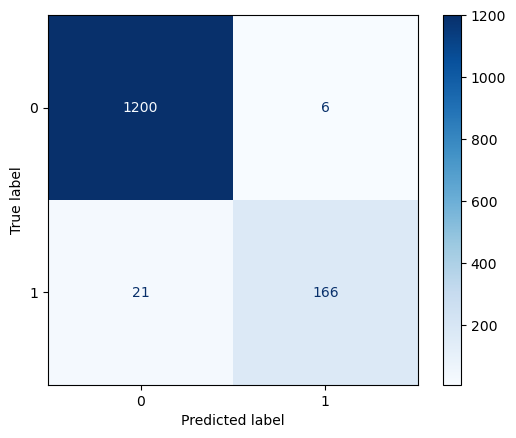

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       0.97      0.89      0.92       187

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [30]:
# Parameter skews for Decision Tree - Chat GPT pipeline - Confusion Matrix

print_test_stats_header()

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                    df['target'],
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=df['target']
                                                   )

for i in [None, 100, 50, 20, 10, 5, 20]:
    dtc = DecisionTreeClassifier(max_depth=i)
    
    pipe_dt = Pipeline(steps=[
        ('chat_gpt_preprocessor', cgpt_preprocess),
        ('decision_tree_classifier', dtc)
    ])
    
    # Run Pipeline
    pipe_dt.fit(X_train, y_train)
    test_pred = pipe_dt.predict(X_test)
    train_pred = pipe_dt.predict(X_train)
    
    # Stats
    print_test_stats(pipe_dt[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

In [31]:
# Decision Tree feature table

dtc_features = pd.DataFrame(dtc.feature_importances_,
             index=cgpt_preprocess.get_feature_names_out()
            ).sort_values(0, ascending=False).reset_index()
dtc_features.columns = ['feature', 'importance']
dtc_features['feature'] = dtc_features['feature'].str.replace('vectorize__', '')
dtc_features.head(20)

,feature,importance
0,char_ngrams__00,0.309565
1,char_ngrams__ 08,0.197189
2,char_ngrams__o 8,0.121874
3,char_ngrams__ 09,0.108385
4,word_ngrams__www,0.061401
5,char_ngrams__0p,0.034108
6,char_ngrams__eply,0.022931
7,char_ngrams__mob,0.018762
8,word_ngrams__uk,0.016615
9,char_ngrams__. |,0.010086



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | LogisticRegression(C=0.01, class_weight='balanced')              | 0.427 | 0.866 | 0.572 | 0.826 | 0.586 | 
 | LogisticRegression(C=0.1, class_weight='balanced')               | 0.708 | 0.920 | 0.800 | 0.938 | 0.797 | 
 | LogisticRegression(C=0.5, class_weight='balanced')               | 0.888 | 0.936 | 0.911 | 0.976 | 0.950 | 
 | LogisticRegression(C=1, class_weight='balanced')                 | 0.942 | 0.952 | 0.947 | 0.986 | 0.982 | 
 | LogisticRegression(C=10, class_weight='balanced')                | 0.994 | 0.941 | 0.967 | 0.991 | 0.999 | 
 | LogisticRegression(C=100, class_weight='balanced')               | 0.994 | 0.947 | 0.970 | 0.992 | 1.000 | 
 | LogisticRegression(C=1000, class_weight='balanced')              | 0.989 | 0.947 | 0.967 | 0.991 | 0.999 | 
 |

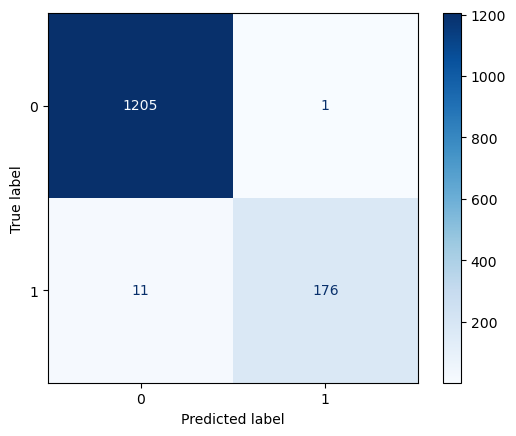

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1206
           1       0.99      0.94      0.97       187

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



In [32]:
# Parameter skews for Logistic Regression - Chat GPT pipeline - Confusion Matrix

print_test_stats_header()

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                    df['target'],
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=df['target']
                                                   )

for i in [0.01, 0.1, 0.5, 1, 10, 100, 1000, 10]:
    lr = LogisticRegression(class_weight='balanced', C=i)
    
    pipe_lr = Pipeline(steps=[
        ('chat_gpt_preprocessor', cgpt_preprocess),
        ('logistic_regression_classifier', lr)
    ])
           
    # Run Pipeline
    pipe_lr.fit(X_train, y_train)
    test_pred = pipe_lr.predict(X_test)
    train_pred = pipe_lr.predict(X_train)

    # Stats
    print_test_stats(pipe_lr[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

In [33]:
# Logistic Regression feature table

coeff_df = pd.DataFrame(zip(cgpt_preprocess.get_feature_names_out(), np.transpose(lr.coef_)), columns=['features', 'coeff'])
coeff_df['features'] = coeff_df['features'].str.replace('vectorize__', '')
coeff_df['abs_coeff'] = abs(coeff_df['coeff'])
coeff_df = coeff_df.sort_values('abs_coeff', ascending=False).reset_index()
coeff_df[['features', 'coeff']].head(20)

,features,coeff
0,word_ngrams__text,[4.257306458778514]
1,word_ngrams__uk,[3.8422049615581724]
2,word_ngrams__call,[3.634035472181048]
3,word_ngrams__my,[-3.4390927462687815]
4,word_ngrams__to,[3.357818949142886]
5,word_ngrams__free,[3.1279947404255326]
6,word_ngrams__www,[2.9828195418771877]
7,word_ngrams__reply,[2.9687010456911906]
8,word_ngrams__gt,[-2.936713523315853]
9,word_ngrams__lt,[-2.901398259651027]



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | RandomForestClassifier(n_estimators=250)                         | 0.994 | 0.888 | 0.938 | 0.984 | 1.000 | 
 | RandomForestClassifier(max_depth=100, n_estimators=250)          | 1.000 | 0.888 | 0.941 | 0.985 | 1.000 | 
 | RandomForestClassifier(max_depth=75, n_estimators=250)           | 1.000 | 0.893 | 0.944 | 0.986 | 1.000 | 
 | RandomForestClassifier(max_depth=50, n_estimators=250)           | 1.000 | 0.893 | 0.944 | 0.986 | 1.000 | 
 | RandomForestClassifier(max_depth=25, n_estimators=250)           | 1.000 | 0.882 | 0.938 | 0.984 | 0.975 | 
 | RandomForestClassifier(max_depth=20, n_estimators=250)           | 1.000 | 0.877 | 0.934 | 0.983 | 0.965 | 
 | RandomForestClassifier(max_depth=15, n_estimators=250)           | 1.000 | 0.856 | 0.922 | 0.981 | 0.953 | 


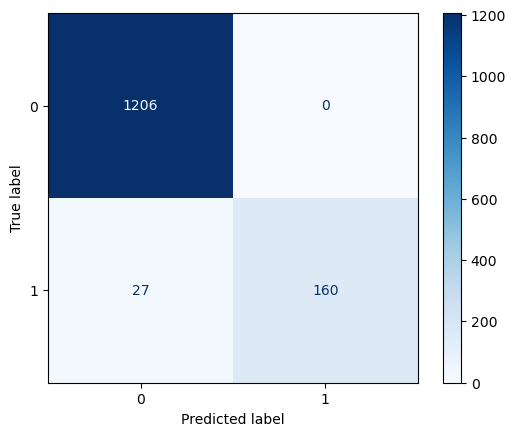

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1206
           1       1.00      0.86      0.92       187

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [34]:
# Parameter skews for Random Forest - Chat GPT pipeline - Confusion Matrix

print_test_stats_header()

for i in [None, 100, 75, 50, 25, 20, 15]:
    rf = RandomForestClassifier(max_depth=i, n_estimators=250)
    
    pipe_rf = Pipeline(steps=[
        ('chat gpt_preprocessor', cgpt_preprocess),
        ('random_forest_classifier', rf)
    ])
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                        df['target'],
                                                        test_size=0.25,
                                                        random_state=42,
                                                        stratify=df['target']
                                                       )
    
    # Run Pipeline
    pipe_rf.fit(X_train, y_train)
    test_pred = pipe_rf.predict(X_test)
    train_pred = pipe_rf.predict(X_train)
    
    # Stats
    print_test_stats(pipe_rf[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

In [35]:
# Random Forest feature table

rf_features = pd.DataFrame(rf.feature_importances_,
             index=cgpt_preprocess.get_feature_names_out()
            ).sort_values(0, ascending=False).reset_index()
rf_features.columns = ['feature', 'importance']
rf_features['feature'] = rf_features['feature'].str.replace('vectorize__', '')
rf_features.head(20)

,feature,importance
0,char_ngrams__ å£,0.012298
1,char_ngrams__ 08,0.010561
2,numeric__org_length,0.009967
3,char_ngrams__l 0,0.009312
4,char_ngrams__00,0.008378
5,char_ngrams__ tx,0.008113
6,char_ngrams__mob,0.007577
7,char_ngrams__ 087,0.007518
8,char_ngrams__o 8,0.007041
9,char_ngrams__087,0.006939



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | SVC(C=0.1, kernel='linear')                                      | 0.994 | 0.877 | 0.932 | 0.983 | 0.948 | 
 | SVC(C=0.5, kernel='linear')                                      | 1.000 | 0.930 | 0.964 | 0.991 | 0.990 | 
 | SVC(C=1, kernel='linear')                                        | 1.000 | 0.941 | 0.970 | 0.992 | 1.000 | 
 | SVC(C=5, kernel='linear')                                        | 1.000 | 0.941 | 0.970 | 0.992 | 1.000 | 
 | SVC(C=10, kernel='linear')                                       | 1.000 | 0.941 | 0.970 | 0.992 | 1.000 | 
 | SVC(C=0.1)                                                       | 1.000 | 0.160 | 0.276 | 0.887 | 0.277 | 
 | SVC(C=0.5)                                                       | 1.000 | 0.866 | 0.928 | 0.982 | 0.965 | 
 |

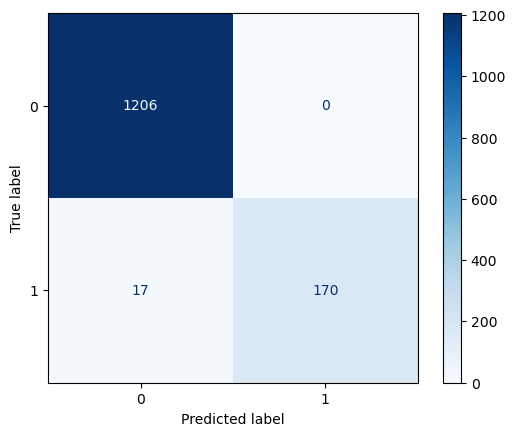

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1206
           1       1.00      0.91      0.95       187

    accuracy                           0.99      1393
   macro avg       0.99      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [36]:
# SVC was recommended by ChatGPT (in addition to Logistic Regression)
# Parameter skews for SVC - Chat GPT pipeline - Confusion Matrix

print_test_stats_header()

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                    df['target'],
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=df['target']
                                                   )

for i in ['linear', 'rbf']: 
    for j in [0.1, 0.5, 1, 5, 10]: 
        svc = SVC(kernel=i, C=j)
    
        pipe_svc = Pipeline(steps=[
            ('chat_gpt_preprocessor', cgpt_preprocess),
            ('svc_classifier', svc)
        ])
               
        # Run Pipeline
        pipe_svc.fit(X_train, y_train)
        test_pred = pipe_svc.predict(X_test)
        train_pred = pipe_svc.predict(X_train)
    
        # Stats
        print_test_stats(pipe_svc[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

In [37]:
# 5x model stability test for optimized models with chat GPT pipeline
models = {
    'dt': DecisionTreeClassifier(max_depth=20),
    'lr': LogisticRegression(class_weight='balanced', C=10),
    'rf  ': RandomForestClassifier(max_depth=50, n_estimators=250),
    'svm': SVC(C=1, kernel='linear'),
    'vote': VotingClassifier(estimators=[('lr', lr), ('rf', rf)], voting='soft')
}

results_list = []

print_test_stats_header()

for i in range(5):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                                df['target'],
                                                                test_size=0.25,
                                                                stratify=df['target']
                                                               )
    for name, model in models.items():
        pipe = Pipeline(steps=[
            ('chat_gpt_preprocessor', cgpt_preprocess),
            ('model', model)
        ])    

        # Run Pipeline
        pipe.fit(X_train, y_train)
        test_pred = pipe.predict(X_test)
        train_pred = pipe.predict(X_train)
    
        # Stats
        print_test_stats(pipe[1], y_test, test_pred, y_train, train_pred) if i==0 else ''

        results_list.append([str(pipe[1]),
                             precision_score(y_test, test_pred),
                             recall_score(y_test, test_pred),
                             f1_score(y_test, test_pred),
                             accuracy_score(y_test, test_pred),
                             f1_score(y_train, train_pred)
                        ])

result_df = pd.DataFrame(results_list, columns=['Model', 'Precision', 'Recall', 'F1_Test', 'Accuracy', 'F1_Train'])

result_df.groupby('Model').agg(['mean', 'std']).style.format(precision=3)



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DecisionTreeClassifier(max_depth=20)                             | 0.971 | 0.904 | 0.936 | 0.983 | 0.991 | 
 | LogisticRegression(C=10, class_weight='balanced')                | 0.989 | 0.936 | 0.962 | 0.990 | 0.999 | 
 | RandomForestClassifier(max_depth=50, n_estimators=250)           | 1.000 | 0.898 | 0.946 | 0.986 | 1.000 | 
 | SVC(C=1, kernel='linear')                                        | 0.994 | 0.930 | 0.961 | 0.990 | 1.000 | 
 | VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10,
                                                 class_weight='balanced')),
                             ('rf',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimat

In [38]:
# hybrid method combining my original cleaning strategy
# with the insight of sending the original text.

def clean_text(text):
    text = text.lower()                                                        #lowercase
    text = re.sub(r'(^|\W)\d+($|\W)', ' ', text)                               #strip numbers, retain words with numbers, ex 1st, h8
    text = re.sub(r'[\(\)\.\?\!\\/<>\$\%\"]', ' ', text)                       #strip ().?!\/<>$%"
    text = re.sub(r'\&\w+\;', ' ', text)                                       #strip html chars ex. &nbsp;
    text = re.sub(r'[&]', 'and', text)                                         #strip &
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore')\
        .decode('utf-8', 'ignore')                                             #convert accent/unicode chars to ascii
    text = text.strip()                                                        #strip whitespace
    return text

df['text_cln'] = df['text'].map(clean_text)
df['text_org_cln'] = df['text'] + ' | ' + df['text_cln']



# Integrate into standard pipeline

numerical_columns = ['org_length']
hybrid_text_column = 'text_org_cln'

# process numeric columns
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# vectorize text column
hybrid_vectorize_transformer = Pipeline(steps=[
    ("vectorizer", TfidfVectorizer()),
])
# apply column transformer
hybrid_preprocess = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_columns),
        ('vectorize', hybrid_vectorize_transformer, hybrid_text_column)
    ],
    remainder='drop'
)


In [39]:
# 5x model stability test for optimized models with hybrid pipeline

models = {
    'dt': DecisionTreeClassifier(max_depth=20),
    'lr': LogisticRegression(class_weight='balanced', C=10),
    'rf  ': RandomForestClassifier(max_depth=75, n_estimators=250)
}

results_list = []

print_test_stats_header()

for i in range(5):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                                df['target'],
                                                                test_size=0.25,
                                                                stratify=df['target']
                                                               )
    for name, model in models.items():
        pipe = Pipeline(steps=[
            ('hybrid_preprocessor', hybrid_preprocess),
            ('model', model)
        ])    

        # Run Pipeline
        pipe.fit(X_train, y_train)
        test_pred = pipe.predict(X_test)
        train_pred = pipe.predict(X_train)
    
        # Stats
        print_test_stats(pipe[1], y_test, test_pred, y_train, train_pred) if i==0 else ''

        results_list.append([str(pipe[1]),
                             precision_score(y_test, test_pred),
                             recall_score(y_test, test_pred),
                             f1_score(y_test, test_pred),
                             accuracy_score(y_test, test_pred),
                             f1_score(y_train, train_pred)
                        ])

result_df = pd.DataFrame(results_list, columns=['Model', 'Precision', 'Recall', 'F1_Test', 'Accuracy', 'F1_Train'])

result_df.groupby('Model').agg(['mean', 'std']).style.format(precision=3)



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DecisionTreeClassifier(max_depth=20)                             | 0.906 | 0.770 | 0.832 | 0.958 | 0.972 | 
 | LogisticRegression(C=10, class_weight='balanced')                | 0.945 | 0.925 | 0.935 | 0.983 | 0.996 | 
 | RandomForestClassifier(max_depth=75, n_estimators=250)           | 1.000 | 0.834 | 0.910 | 0.978 | 1.000 | 
